This example is a nonlinear SVM classification task.

The approach is to add a polynomial feature to allow linear separability

Code taken from "Hands-On Machine Learning with Scikit-Learn and Tensorflow: Concepts, Tools and Techniques to Build Intelligent Systems" by Aurélien Géron

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(noise = 0.1)

Let's plot the data to see what it looks like. Note that make_moons() generates a random set of data.

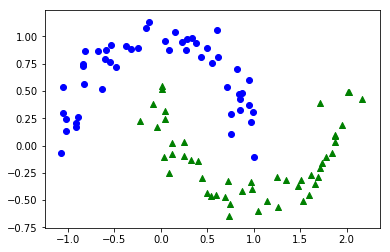

In [94]:
plt.scatter([x[0] for x in X[y==0]], [x[1] for x in X[y==0]], marker='o', color='b')
plt.scatter([x[0] for x in X[y==1]], [x[1] for x in X[y==1]], marker='^', color='g')
plt.show()

In [68]:
poly_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

poly_svm_clf.fit(X ,y)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

Let's redo the plot and this time include the prediction line generated by the SVM.

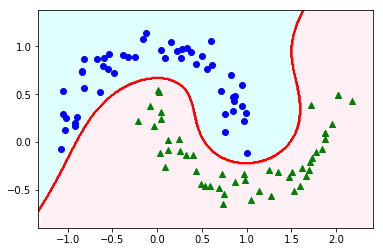

In [93]:
x_min, x_max = X[:,0].min() - 0.25, X[:,0].max() + 0.25
y_min, y_max = X[:,1].min() - 0.25, X[:,1].max() + 0.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = poly_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx,yy,Z, colors=('red')) # Draw the curve
plt.contourf(xx,yy,Z,1, colors=('lightcyan', 'lavenderblush')) # Shades the areas
plt.scatter([x[0] for x in X[y==0]], [x[1] for x in X[y==0]], marker='o', color='b')
plt.scatter([x[0] for x in X[y==1]], [x[1] for x in X[y==1]], marker='^', color='g')
plt.show()